# Some of the annotations for the ROIS are out of place

In [6]:

import cv2
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import update_display
PATH = "/mnt/d/Datasets/mini-DDSM/"
imgPATH = PATH + "MINI-DDSM-Complete-PNG-16/"
benign_roi_path = PATH + "ROI_2/Benign/"
malignant_roi_path = PATH + "ROI_2/Malignant/"
fullimg_benign_path = PATH + "fullimg/benign/"
fullimg_malignant_path = PATH + "fullimg/malignant/"
image_size=300
output_size=300

In [7]:
csvdata = pd.read_excel(PATH + str("Data.xlsx"))
category = csvdata.Status.to_numpy()
img_path = csvdata.fullPath.to_numpy()
mask_path = csvdata.Tumour_Contour.to_numpy()
filename = csvdata.fileName.to_numpy()

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

In [8]:
def ROI_extraction(mask_dir,image_dir,filename,roi_dir):
    img = cv2.imread(mask_dir,cv2.IMREAD_GRAYSCALE)
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img,127,255,0)
    contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    x,y,w,h = cv2.boundingRect(cnt)
    # img = cv2.drawContours(img,[cnt],0,(0,255,255),2)
    # img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    data = cv2.imread(image_dir,cv2.IMREAD_GRAYSCALE)
    # data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
    data = cv2.medianBlur(data,3)
    
    # if h+100>image_size and w+100>image_size:
    #     y -=50
    #     x -=50
    #     h +=100
    #     w +=100
    #     if x<0:
    #         x=0
    #     elif x+w>data.shape[1]:
    #         x = data.shape[1] - image_size
    #     if y<0:
    #         y=0
    #     elif y+h>data.shape[0]:
    #         y = data.shape[0] - image_size
    # else:  
    #     if h < image_size:
    #         y = int(y + (h/2) - (image_size/2))
    #         h=image_size
    #         if y<0:
    #             y=0
    #         elif y+h>data.shape[0]:
    #             y = data.shape[0] - image_size
    #     if w < image_size:
    #         x = int(x+(w/2)-(image_size/2))
    #         w=image_size  
    #         if x<0:
    #             x=0
    #         elif x+w>data.shape[1]:
    #             x = data.shape[1] - image_size
    y -=50
    x -=50
    h +=100
    w +=100
    if y<0:
        y=0
    elif y+h>data.shape[0]:
        y = data.shape[0] - image_size
    if x<0:
        x=0
    elif x+w>data.shape[1]:
        x = data.shape[1] - image_size
    data = data[y:y+h,x:x+w]
    data = clahe.apply(data)
    data=cv2.resize(data,(output_size,output_size))
    cv2.imwrite(roi_dir+filename,data)

def Dataset_Selection(image_dir,filename,data_dir,preprocess=False):
    data = cv2.imread(image_dir,cv2.IMREAD_GRAYSCALE)
    if preprocess:
        data = cv2.medianBlur(data,3)
        data = clahe.apply(data)
    data = cv2.resize(data,(output_size,2*output_size))
    cv2.imwrite(data_dir+filename,data)
    


# Seperating Datas

In [4]:
# for i,x in enumerate(category):
#     if x == "Benign":
#         if mask_path[i] == "-":
#             print(filename[i] + " benign image has no ROI")
#         else:
#             mask = imgPATH + mask_path[i].replace('\\','/')
#             image_file = imgPATH + img_path[i].replace('\\','/')
#             Dataset_Selection(image_file,filename[i],fullimg_benign_path)
#             print(filename[i] + " to benign directory")
#     elif x == "Cancer":
#         if mask_path[i] == "-":
#             print(filename[i] + " malignant image has no ROI")
#         else:
#             mask = imgPATH + mask_path[i].replace('\\','/')
#             image_file = imgPATH + img_path[i].replace('\\','/')
#             Dataset_Selection(image_file,filename[i],fullimg_Malignant_path)
#             print(filename[i] + " to malignant directory")
#     else:
#         print(filename[i] + " is normal image and not extracted")

# print("Extraction completed.")

# Extract ROI

In [5]:
Progress_display = display("0% completed",display_id="Progress_display")
for i,x in enumerate(category):
    image_file = imgPATH + img_path[i].replace('\\','/')
    if x == "Benign":
        if mask_path[i] != "-":
            mask = imgPATH + mask_path[i].replace('\\','/')
            ROI_extraction(mask,image_file,filename[i],benign_roi_path)   
        # else:
            # Dataset_Selection(image_file,filename[i],fullimg_benign_path)
            # print(filename[i] + " benign image has no ROI")
            
    elif x == "Cancer":
        if mask_path[i] != "-":
            mask = imgPATH + mask_path[i].replace('\\','/')
            ROI_extraction(mask,image_file,filename[i],malignant_roi_path)
        # else:
            # Dataset_Selection(image_file,filename[i],fullimg_malignant_path)
    update_display(str(int(i/len(category)*100))+"% completed",display_id="Progress_display")
print("Extraction completed.")

'21% completed'

In [6]:
img = cv2.imread(imgPATH + str("Benign/0029/C_0029_1.LEFT_CC.png"))
img.shape

(2324, 1336, 3)

In [11]:
img.shape[0]

2604

541 948 505 397


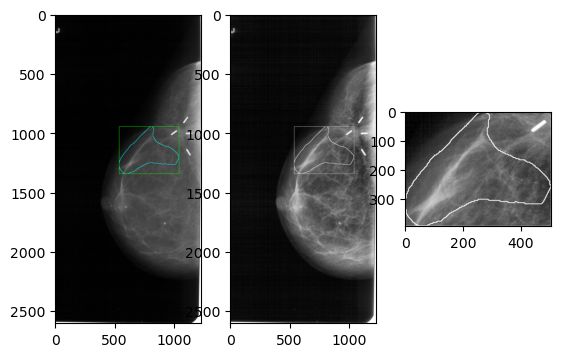

In [21]:
img = cv2.imread(imgPATH + str("Cancer/1613/A_1613_1.LEFT_CC_Mask.png"))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,127,255,0)
contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)
print(x,y,w,h)
data = cv2.imread(imgPATH + str("Cancer/1613/A_1613_1.LEFT_CC.png"))
img = cv2.drawContours(data,[cnt],0,(0,255,255),2)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)

plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
data = clahe.apply(data)
plt.subplot(1,3,2)
plt.imshow(data, cmap="gray")
data = data[y:y+h,x:x+w]
plt.subplot(1,3,3)
plt.imshow(data, cmap="gray")
# cv2.imwrite(PATH+str("testing1.png")
#             ,data
#             # ,[cv2.IMWRITE_JPEG_QUALITY, 100]
#             )


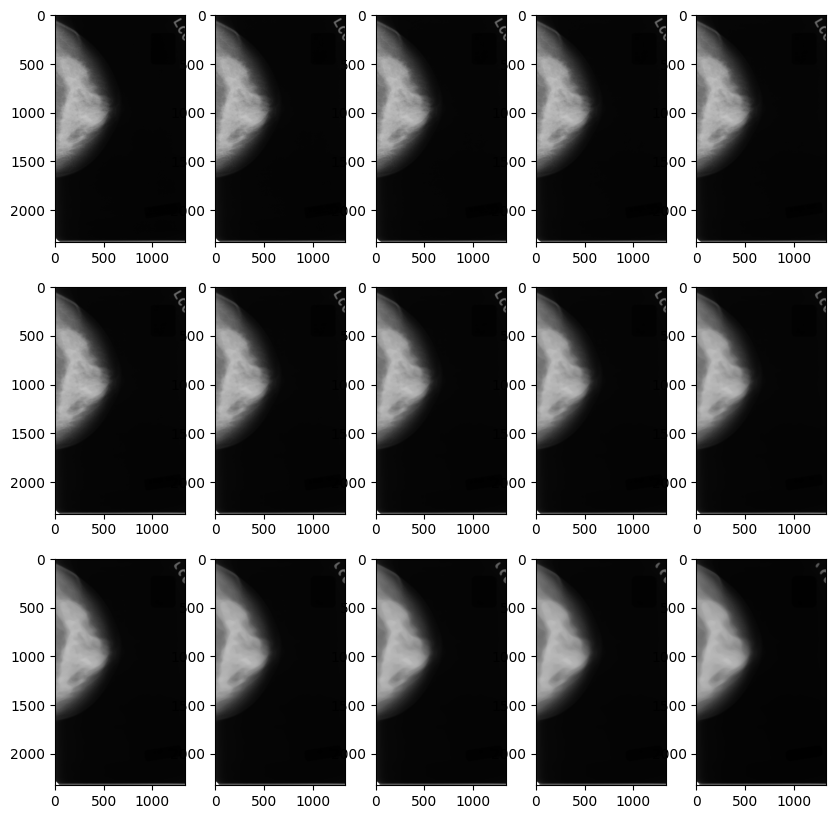

In [8]:
data = cv2.imread(imgPATH + str("Benign/0029/C_0029_1.LEFT_CC.png"))
data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 10))
for x,i in enumerate(range(1, 31, 2)):
    data = cv2.medianBlur(data, i)
    plt.subplot(3,5,x+1)
    plt.imshow(data, cmap = "gray")
        